<a href="https://colab.research.google.com/github/kodenshacho/ColaboratoryNotes/blob/main/deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

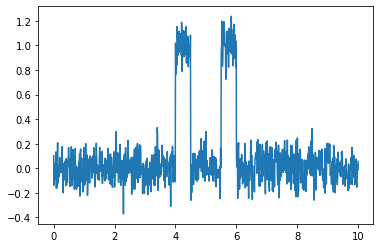

Epoch 1/1000
32/32 [==============================] - 1s 2ms/step - loss: 1.0510 - accuracy: 0.0000e+00
Epoch 2/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.0000e+00
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.4614 - accuracy: 0.0000e+00
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.0000e+00
Epoch 5/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.3778 - accuracy: 0.0000e+00
Epoch 6/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.3683 - accuracy: 0.0000e+00
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.3628 - accuracy: 0.0000e+00
Epoch 8/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.3579 - accuracy: 0.0000e+00
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.0000e+00
Epoch 10/1000
32/32 [==============================] - 0s 2ms/st

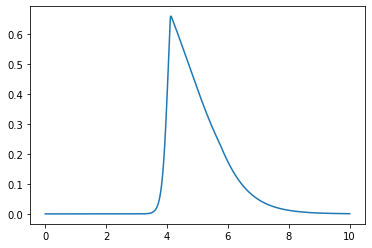

Peak 1: 4.134134134134134
Peak 2: 5.005005005005005


In [2]:

import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for two peaks
x = np.linspace(0, 10, 1000)
y = np.zeros_like(x)
y[400:450] = 1
y[550:600] = 1

# Add noise to the data
y += np.random.normal(0, 0.1, size=y.shape)

# Plot the data
plt.plot(x, y)
plt.show()

# Use a deep learning model to fit the peaks
import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,), activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x, y, epochs=1000)

# Use the model to make predictions
predictions = model.predict(x)

# Plot the predictions
plt.plot(x, predictions)
plt.show()

# Print the predicted values for the peaks
print(f"Peak 1: {x[np.argmax(predictions[:500])]}")
print(f"Peak 2: {x[500 + np.argmax(predictions[500:])]}")

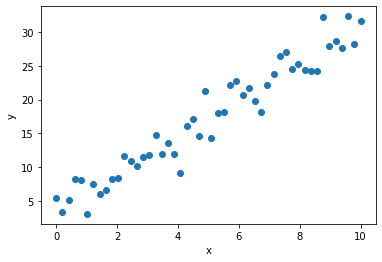

NameError: ignored

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Load energy-dispersion spectroscopy data
#data = np.loadtxt('spectroscopy_data.txt')
# Generate fake data
np.random.seed(0)  # Set seed for reproducibility
x = np.linspace(0, 10, 50)
y = 3 * x + 2 + np.random.normal(0, 2, len(x))

# Plot the data
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
# Normalize data by subtracting mean and dividing by standard deviation
mean = np.mean(data)
std = np.std(data)
data = (data - mean) / std

# Use deep learning to predict wavelet coefficients
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(50, 50, 50), max_iter=1000)
X = np.arange(len(data)).reshape(-1, 1)
y = data
model.fit(X, y)

# Extract wavelet coefficients using the predicted wavelet function
wavelet_coefficients = model.predict(X)

# Use Gaussian mixture model to fit multiple peaks
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(wavelet_coefficients.reshape(-1, 1))

# Extract peak locations and amplitudes
peak_locations = gmm.means_
peak_amplitudes = np.exp(gmm.precisions_)

# Plot the data and the fitted peaks
plt.plot(data)
for peak_location, peak_amplitude in zip(peak_locations, peak_amplitudes):
    plt.plot([peak_location, peak_location], [0, peak_amplitude], 'r--')
plt.show()